In [7]:
import numpy as np

import pandas as pd

import pyarrow.parquet as pq

import matplotlib.path as path

import matplotlib.pyplot as plt

import seaborn as sns

#List of Vertices
points = [(-1735, 250), (-2024, 398), (-2806, 742), (-2472, 1233), (-1565, 580)]

#Define Area
Area = path.Path(vertices=points)

#Parse Parquet File
data = pd.read_parquet('/Users/jq4386/Desktop/Evil Geniuses /game_state_frame_data.parquet')

df = data[['x', 'y', 'z']]
df = data.copy()


#Determine whether each row is inside the specified area
def is_inside_polygon(row):
    'Uses odd/even raycasting for PiP function, which runs at O(v) runtime, where v is number of vertices, which is practically equivalent to O(1) when v is very small. Could in theory be optimized by comparing only relevant edges, but determining which edges are relevant would take a series of calculations as well, and is usually not worth for relatively small number of vertices e.g. 5.'
    point = (row['x'], row['y'])
    return Area.contains_point(point) & (row['z'] >= 285) & (row['z'] <= 421) 

df['is_inside'] = df.apply(is_inside_polygon, axis=1)

data['is_inside'] = df['is_inside']

data


,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,is_inside
0,1,2511,T,Team1,100,100,True,-1310,-3333,294,...,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0,False
1,1,2527,T,Team1,100,100,True,-1303,-3322,294,...,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0,False
2,1,2543,T,Team1,100,100,True,-1290,-3303,292,...,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0,False
3,1,2559,T,Team1,100,100,True,-1275,-3280,290,...,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0,False
4,1,2575,T,Team1,100,100,True,-1254,-3262,288,...,TSpawn,1,01:55,5,5,False,de_overpass,0.0,Player0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221325,30,514156,T,Team2,0,0,False,-1508,-372,200,...,Water,41,01:14,1,4,False,de_overpass,0.0,Player9,False
221326,30,514172,T,Team2,0,0,False,-1508,-372,200,...,Water,41,01:14,1,4,False,de_overpass,0.0,Player9,False
221327,30,514188,T,Team2,0,0,False,-1508,-372,200,...,Water,42,01:14,1,4,False,de_overpass,0.0,Player9,False
221328,30,514204,T,Team2,0,0,False,-1508,-372,200,...,Water,42,01:14,1,4,False,de_overpass,0.0,Player9,False


In [8]:
df = data.copy()
weapon_classes = df['inventory'].apply(lambda x: [item['weapon_class'] for item in x] if x is not None else [])
weapon_classes
df['weapon_classes'] = weapon_classes
data = df

data

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,is_inside,weapon_classes
0,1,2511,T,Team1,100,100,True,-1310,-3333,294,...,0,01:55,5,5,False,de_overpass,0.0,Player0,False,"[Pistols, Grenade]"
1,1,2527,T,Team1,100,100,True,-1303,-3322,294,...,0,01:55,5,5,False,de_overpass,0.0,Player0,False,"[Pistols, Grenade]"
2,1,2543,T,Team1,100,100,True,-1290,-3303,292,...,0,01:55,5,5,False,de_overpass,0.0,Player0,False,"[Pistols, Grenade]"
3,1,2559,T,Team1,100,100,True,-1275,-3280,290,...,0,01:55,5,5,False,de_overpass,0.0,Player0,False,"[Pistols, Grenade]"
4,1,2575,T,Team1,100,100,True,-1254,-3262,288,...,1,01:55,5,5,False,de_overpass,0.0,Player0,False,"[Pistols, Grenade]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221325,30,514156,T,Team2,0,0,False,-1508,-372,200,...,41,01:14,1,4,False,de_overpass,0.0,Player9,False,[]
221326,30,514172,T,Team2,0,0,False,-1508,-372,200,...,41,01:14,1,4,False,de_overpass,0.0,Player9,False,[]
221327,30,514188,T,Team2,0,0,False,-1508,-372,200,...,42,01:14,1,4,False,de_overpass,0.0,Player9,False,[]
221328,30,514204,T,Team2,0,0,False,-1508,-372,200,...,42,01:14,1,4,False,de_overpass,0.0,Player9,False,[]


In [9]:
#Q2 a)
df = data.copy()

# Filter rows for Team 2, T side, and players inside the light blue boundary
df_filtered  = df[(df['is_inside'] == True) & (df['team'] == 'Team2') & (df['side'] == 'T')]

subset = df_filtered.drop_duplicates(subset=['round_num', 'player'])

'According to the results, Team2 only entered the light blue region as T for 1 round, and only 2 players entered that region for that round (r16). As such, it is safe to conclude that entering via the light blue region is not a common strategy employed by Team2 on side T.'

subset

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,is_inside,weapon_classes
78246,16,298025,T,Team2,97,98,True,-2139,681,300,...,30,00:10,4,0,True,de_overpass,0.0,Player5,True,[Pistols]
211046,16,298057,T,Team2,68,83,True,-2183,907,296,...,30,00:10,4,0,True,de_overpass,0.0,Player9,True,[Pistols]


In [10]:
#Q2 b)
df = data.copy()

df['has_rifle_or_smg'] = df['weapon_classes'].apply(lambda x: 'Rifle' in x or 'SMG' in x)

df_filtered = df[(df['team'] == 'Team2') & (df['side'] == 'T') & (df['area_name'] == 'BombsiteB') & (df['has_rifle_or_smg'] == True)]
df_filtered = df_filtered.sort_values('tick')

#Filters the dataframe to only includes players who are on Team2 playing as T, is inside BombsiteB and has either a Rifle or a SMG in their inventory 
def get_tick_two_players(group):
    player_entries = group.drop_duplicates(subset='player')
    if len(player_entries) >= 2:
        return player_entries.reset_index().at[1, 'seconds'] 
    else:
        return None

meanTimer = df_filtered.groupby('round_num').apply(get_tick_two_players).mean()

meanTimer

29.666666666666668

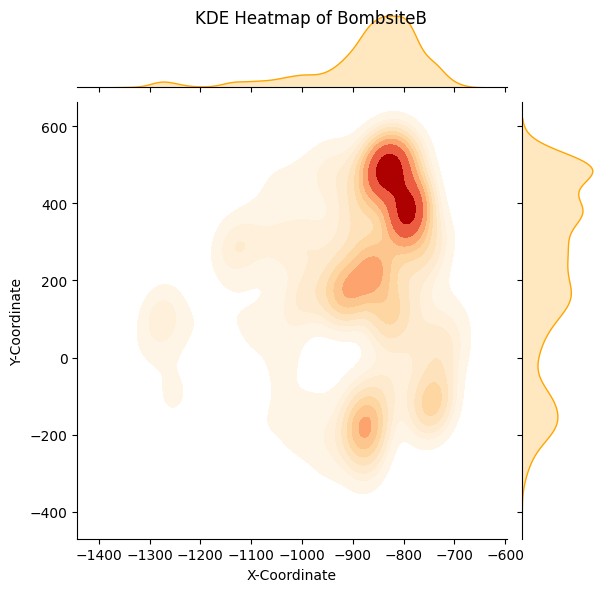

In [11]:
df = data.copy()

#Filter values to only show when Team2 is CT and in BombsiteB. Also eliminate dead player locations.
df_filtered = df[(df['team']=='Team2') & (df['side']=='CT') & (df['area_name']=='BombsiteB') & (df['is_alive'] == True)]

#Create heatmap to show relative density inside the area
heatmap = sns.jointplot(data=df_filtered, x = 'x', y='y', kind='kde', cmap='OrRd', fill=True, color='orange')

'''
A KDE (Kernel Density Estimation) jointplot was chosen here instead of a regular heatmap/kdeplot to give an additional axes-specific representation of the distribution of players. This could provide insight on tactics such as peaking, hard-scoping, sniping etc.
sns (seaborn) is used here because it has signifcantly optimized performance compared to other methods e.g. scipy.stats.gaussian_kde
'''

heatmap.set_axis_labels('X-Coordinate', 'Y-Coordinate')
heatmap.fig.suptitle('KDE Heatmap of BombsiteB')

plt.show()

